# Music Genre Classification

Music has been an important part of our lives since time immemorial. Every artist has a signature, making music a subjective art. We have scales/metrics to measure the quality of music. But, is it possible to train a machine learning model to predict the genre and quality of the music?<br>

Currently, many music aggregator applications rely on machine learning to power their recommendation engine, and curate playlists. MachineHack is challenging data scientists and machine learning practitioners to build a highly scalable ML model for a music aggregator app (Company ABC) to accurately predict the genre of songs in the dataset.<br>

About Dataset:<br>

Training dataset: 17,996 rows with 17 columns <br>

Column details: artist name; track name; popularity; ‘danceability’; energy; key; loudness; mode; ‘speechiness’; ‘acousticness’; ‘instrumentalness’; liveness; valence; tempo; duration in milliseconds and time_signature. <br>

Target Variable: 'Class’ such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood <br>

Test dataset: 7,713 rows with 16 columns <br>

Skills:<br>

Optimizing multi-class log loss to generalize well on unseen data<br>

In [1]:
## Importing Libaries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pylab
import regex
from scipy.special import inv_boxcox

In [2]:
## Importing the data set train and test
df= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
print("Train Shape: {}".format(df.shape))
print("Test Shape: {}".format(df_test.shape))

Train Shape: (17996, 17)
Test Shape: (7713, 16)


In [4]:
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [5]:
df_test.head()

Artist Name                                Track Name  Popularity  \
0      David Bowie              Space Oddity - 2015 Remaster        73.0   
1      Crimson Sun                       Essence of Creation        34.0   
2             P!nk                          Raise Your Glass        78.0   
3     Shawn Mendes                                    Wonder        80.0   
4  Backstreet Boys  Helpless When She Smiles - Radio Version        48.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.310   0.403   NaN   -13.664     1       0.0326       0.07260   
1         0.511   0.955   1.0    -5.059     1       0.1290       0.00040   
2         0.700   0.709   7.0    -5.006     1       0.0839       0.00480   
3         0.333   0.637   1.0    -4.904     0       0.0581       0.13100   
4         0.393   0.849  11.0    -4.114     1       0.0459       0.00421   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.000093    0.1390    0.466  134.480       318027.000000   
1          0.000009    0.2630    0.291  151.937       220413.000000   
2               NaN    0.0289    0.625  122.019       202960.000000   
3          0.000018    0.1490    0.132  139.898       172693.000000   
4               NaN    0.1620    0.222   74.028            4.093117   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [8]:
df.describe(include= 'all').T

count unique              top freq           mean  \
Artist Name           17996   9149  Backstreet Boys   69            NaN   
Track Name            17996  15129           Dreams    9            NaN   
Popularity          17568.0    NaN              NaN  NaN      44.512124   
danceability        17996.0    NaN              NaN  NaN       0.543433   
energy              17996.0    NaN              NaN  NaN       0.662777   
key                 15982.0    NaN              NaN  NaN       5.952447   
loudness            17996.0    NaN              NaN  NaN       -7.91066   
mode                17996.0    NaN              NaN  NaN       0.636753   
speechiness         17996.0    NaN              NaN  NaN       0.079707   
acousticness        17996.0    NaN              NaN  NaN       0.247082   
instrumentalness    13619.0    NaN              NaN  NaN       0.177562   
liveness            17996.0    NaN              NaN  NaN        0.19617   
valence             17996.0    NaN              NaN  NaN       0.486208   
tempo               17996.0    NaN              NaN  NaN     122.623294   
duration_in min/ms  17996.0    NaN              NaN  NaN  200744.458851   
time_signature      17996.0    NaN              NaN  NaN       3.924039   
Class               17996.0    NaN              NaN  NaN       6.695821   

                              std       min       25%       50%        75%  \
Artist Name                   NaN       NaN       NaN       NaN        NaN   
Track Name                    NaN       NaN       NaN       NaN        NaN   
Popularity              17.426928       1.0      33.0      44.0       56.0   
danceability             0.166268    0.0596     0.432     0.545      0.659   
energy                   0.235373   0.00002     0.509       0.7       0.86   
key                      3.196854       1.0       3.0       6.0        9.0   
loudness                 4.049151   -39.952    -9.538    -7.016     -5.189   
mode                     0.480949       0.0       0.0       1.0        1.0   
speechiness              0.083576    0.0225    0.0348    0.0474      0.083   
acousticness             0.310632       0.0    0.0043    0.0814      0.434   
instrumentalness         0.304048  0.000001  0.000089   0.00391        0.2   
liveness                 0.159212    0.0119    0.0975     0.129      0.258   
valence                  0.240195    0.0183     0.297     0.481      0.672   
tempo                   29.571527    30.557  99.62075  120.0655  141.96925   
duration_in min/ms  111989.127131   0.50165  166337.0  209160.0   252490.0   
time_signature           0.361618       1.0       4.0       4.0        4.0   
Class                    3.206073       0.0       5.0       8.0       10.0   

                          max  
Artist Name               NaN  
Track Name                NaN  
Popularity              100.0  
danceability            0.989  
energy                    1.0  
key                      11.0  
loudness                1.355  
mode                      1.0  
speechiness             0.955  
acousticness            0.996  
instrumentalness        0.996  
liveness                  1.0  
valence                 0.986  
tempo                 217.416  
duration_in min/ms  1477187.0  
time_signature            5.0  
Class                    10.0

In [9]:
df_test.describe(include= 'all').T

count unique       top freq           mean  \
Artist Name           7713   5010  Westlife   37            NaN   
Track Name            7713   7095      Fire    7            NaN   
Popularity          7486.0    NaN       NaN  NaN      44.968074   
danceability        7713.0    NaN       NaN  NaN        0.54811   
energy              7713.0    NaN       NaN  NaN       0.663465   
key                 6905.0    NaN       NaN  NaN       5.924692   
loudness            7713.0    NaN       NaN  NaN      -7.840913   
mode                7713.0    NaN       NaN  NaN       0.646311   
speechiness         7713.0    NaN       NaN  NaN       0.080052   
acousticness        7713.0    NaN       NaN  NaN         0.2414   
instrumentalness    5804.0    NaN       NaN  NaN       0.170052   
liveness            7713.0    NaN       NaN  NaN       0.198331   
valence             7713.0    NaN       NaN  NaN       0.489787   
tempo               7713.0    NaN       NaN  NaN     122.976657   
duration_in min/ms  7713.0    NaN       NaN  NaN  199424.533751   
time_signature      7713.0    NaN       NaN  NaN        3.91806   

                              std       min       25%       50%       75%  \
Artist Name                   NaN       NaN       NaN       NaN       NaN   
Track Name                    NaN       NaN       NaN       NaN       NaN   
Popularity              17.401707       1.0      33.0      44.0      57.0   
danceability             0.164906       0.0      0.44     0.549     0.661   
energy                   0.234822   0.00002      0.51     0.699     0.863   
key                      3.238735       1.0       3.0       6.0       9.0   
loudness                 3.982363   -36.544    -9.527    -6.917    -5.184   
mode                     0.478145       0.0       0.0       1.0       1.0   
speechiness              0.084228       0.0    0.0348     0.047    0.0833   
acousticness             0.308006       0.0    0.0046    0.0756     0.406   
instrumentalness         0.298011  0.000001  0.000092   0.00401   0.16525   
liveness                 0.161399    0.0169    0.0985     0.131      0.26   
valence                  0.237996       0.0     0.306     0.484     0.672   
tempo                   29.723547       0.0    99.678    121.14   141.984   
duration_in min/ms  113110.012743   0.68745  165566.0  208889.0  250694.0   
time_signature           0.369727       0.0       4.0       4.0       4.0   

                          max  
Artist Name               NaN  
Track Name                NaN  
Popularity              100.0  
danceability            0.975  
energy                    1.0  
key                      11.0  
loudness                0.878  
mode                      1.0  
speechiness              0.96  
acousticness            0.995  
instrumentalness        0.987  
liveness                0.992  
valence                 0.982  
tempo                 249.438  
duration_in min/ms  1561133.0  
time_signature            5.0

In [10]:
def english_words_keeper(model_data):
    md_ = regex.sub('[^a-zA-Z0-9]',' ',model_data)
    return md_

df['Artist Name'] = df['Artist Name'].apply(english_words_keeper,1)
df_test['Artist Name'] = df_test['Artist Name'].apply(english_words_keeper,1)
df['Track Name'] = df['Track Name'].apply(english_words_keeper,1)
df_test['Track Name'] = df_test['Track Name'].apply(english_words_keeper,1)

## Treating Missing Values

In [11]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [12]:
df_test.isnull().sum()

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [13]:
mapper= {'Class':{0: "Acoustic/Folk", 1: "Alt Music", 2: "Blues", 3: "Bollywood", 4: "Country", 5: "HipHop", 6: "Indie Alt",7: "Instrumental",8: "Metal", 9:"Pop",10:"Rock"}}
df= df.replace(mapper)

In [14]:
df['Class'].value_counts()

Rock             4949
Indie Alt        2587
Pop              2524
Metal            1854
HipHop           1447
Alt Music        1373
Blues            1272
Acoustic/Folk     625
Instrumental      576
Bollywood         402
Country           387
Name: Class, dtype: int64

In [15]:
## Replacing Missing Values
df['Popularity']= df['Popularity'].interpolate(method='linear')
df_test['Popularity']= df_test['Popularity'].interpolate(method='linear')
df['instrumentalness']= df['instrumentalness'].interpolate(method='linear')
df_test['instrumentalness']= df_test['instrumentalness'].interpolate(method='linear')
df['key']= df['key'].interpolate(method='ffill')
df_test['key']= df_test['key'].interpolate(method='ffill')
df['key']= df['key'].interpolate(method='bfill')
df_test['key']= df_test['key'].interpolate(method='bfill')

In [16]:
df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      1
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [17]:
df_test.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [18]:
df['instrumentalness']= df['instrumentalness'].fillna(df['instrumentalness'].median())

In [19]:
df['duration_in min']= df['duration_in min/ms']/60000
df_test['duration_in min']= df_test['duration_in min/ms']/60000

## Outliers

In [20]:
def outlier(df,feature):
    plt.figure(figsize=(10,6))
    sns.boxplot(df[feature], palette= 'YlGn_r')
    plt.show()

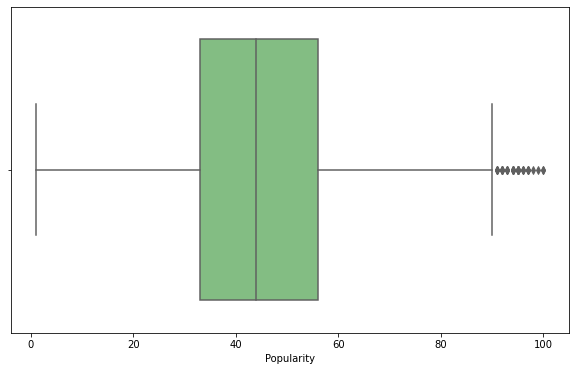

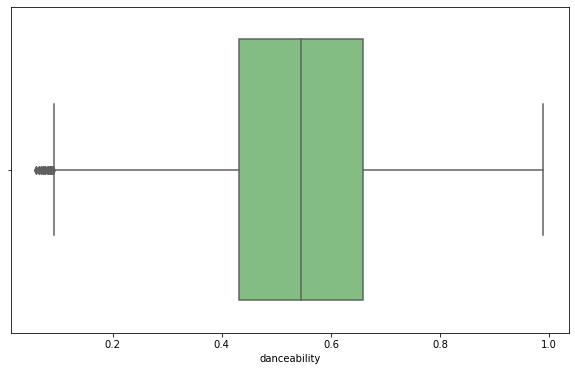

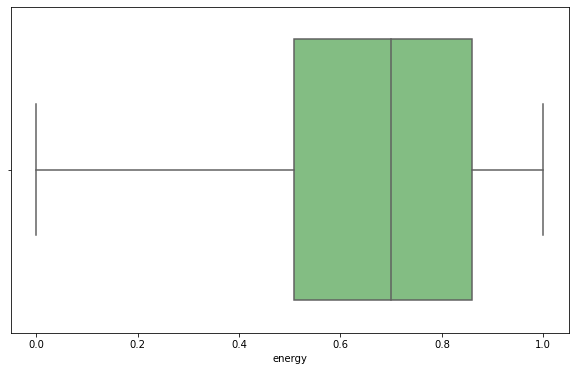

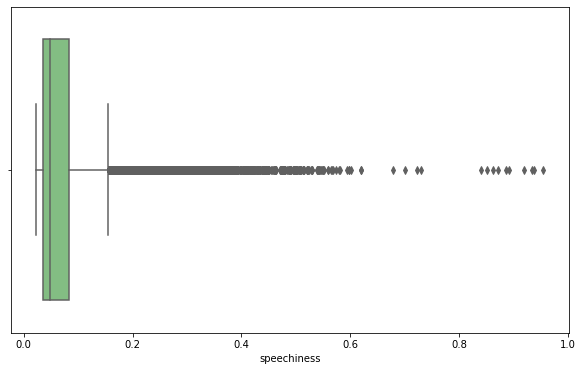

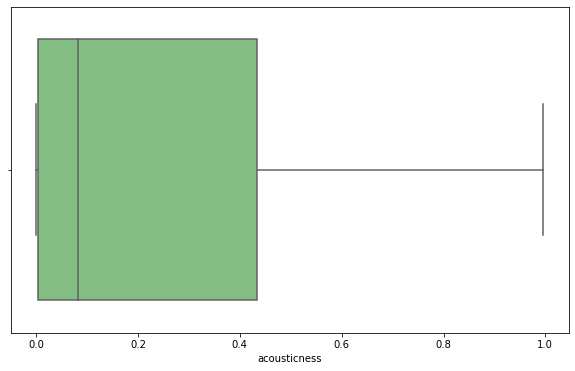

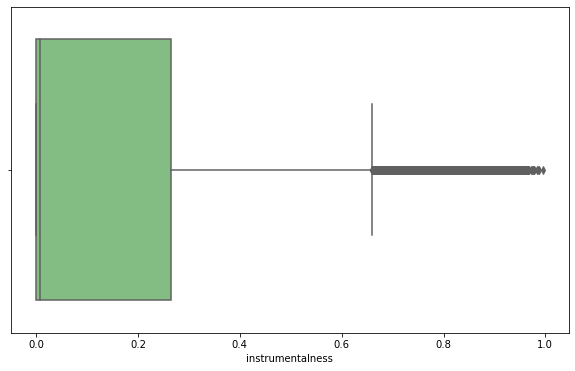

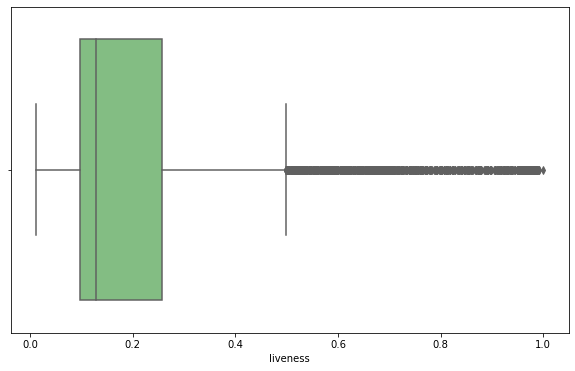

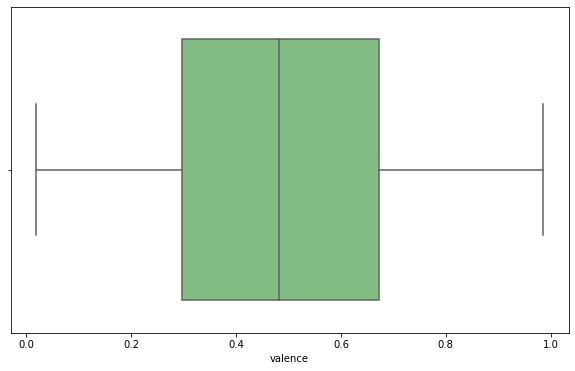

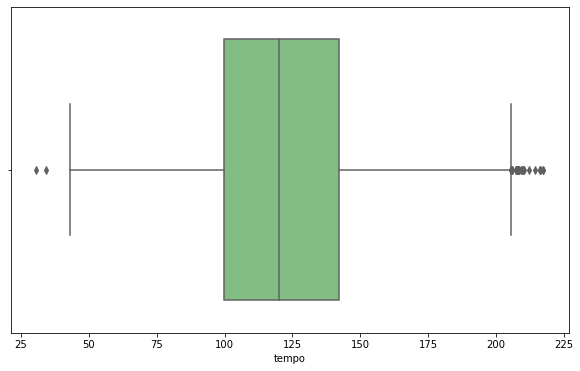

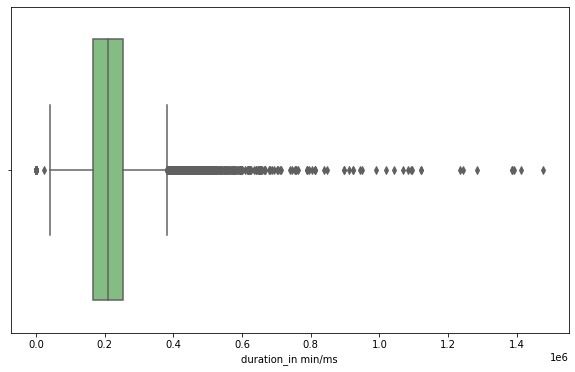

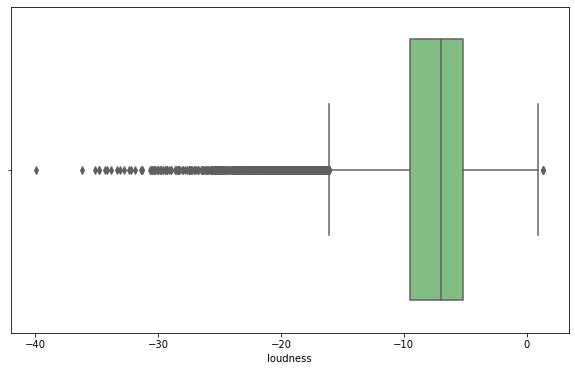

In [21]:
outlier(df, 'Popularity'),
outlier(df, 'danceability'),
outlier(df, "energy"),
outlier(df, "speechiness"),
outlier(df, "acousticness")
outlier(df, 'instrumentalness'),
outlier(df, 'liveness'),
outlier(df, "valence"),
outlier(df, "tempo"),
outlier(df, "duration_in min/ms")
outlier(df, "loudness")

In [22]:
df.nunique()

Artist Name            9132
Track Name            14134
Popularity              176
danceability            909
energy                 1208
key                      11
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
instrumentalness       8305
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
Class                    11
duration_in min       14121
dtype: int64

In [23]:
df['time_signature'].value_counts(normalize= True)

4    0.914148
3    0.068237
5    0.011280
1    0.006335
Name: time_signature, dtype: float64

## Visulization

In [24]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[feature], rug=True, hist= True, kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

##### plot_data(df, 'Popularity'),
plot_data(df, 'danceability'),
plot_data(df, "energy"),
plot_data(df, "speechiness"),
plot_data(df, "acousticness")
plot_data(df, 'instrumentalness'),
plot_data(df, 'liveness'),
plot_data(df, "valence"),
plot_data(df, "tempo"),
plot_data(df, "duration_in min/ms")
plot_data(df, "loudness")

## Target Variable(Class)

<AxesSubplot:xlabel='Class', ylabel='count'>

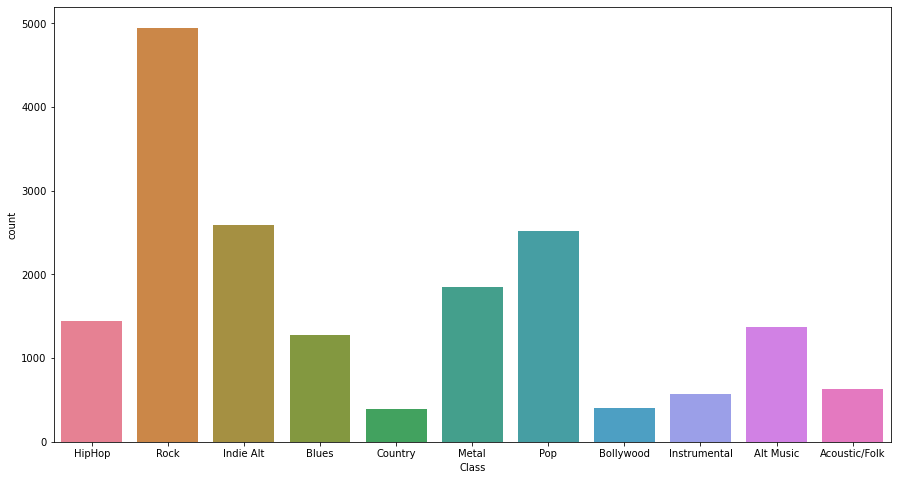

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='Class', data= df, palette= 'husl')

In [27]:
def cat_viz(df,feature):
    plt.figure(figsize=(10,6))
    sns.countplot(df[feature])
    plt.show()
def cat_viz_2(df,feature, target):
    plt.figure(figsize=(10,6))
    sns.countplot(df[feature], hue= df[target])
    plt.show()

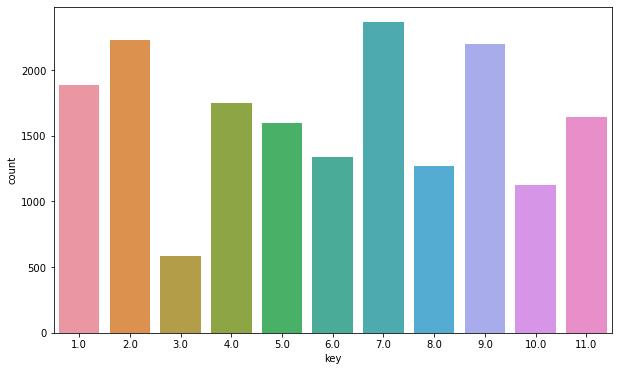

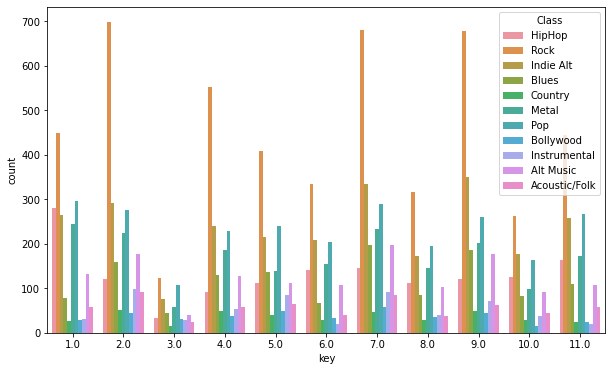

In [28]:
cat_viz(df, "key"), 
cat_viz_2(df, "key", "Class")

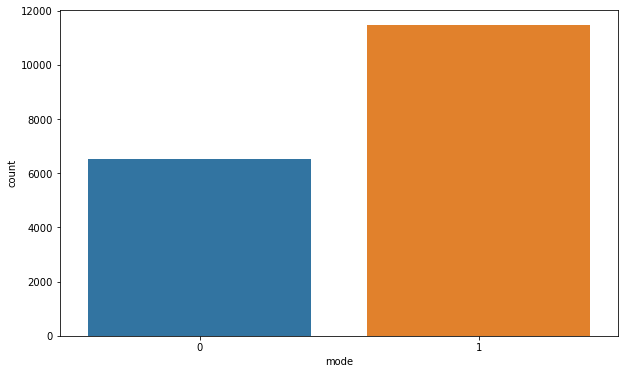

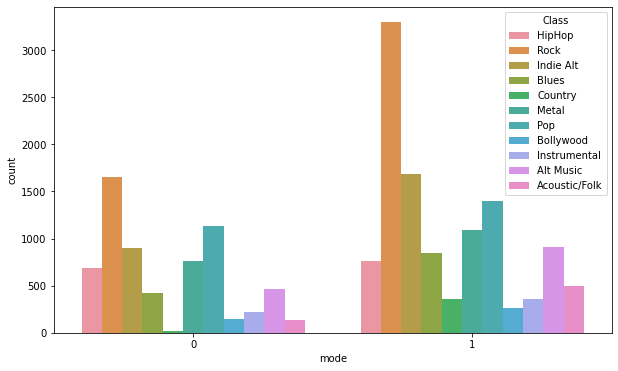

In [29]:
cat_viz(df, "mode"), 
cat_viz_2(df, "mode", "Class")

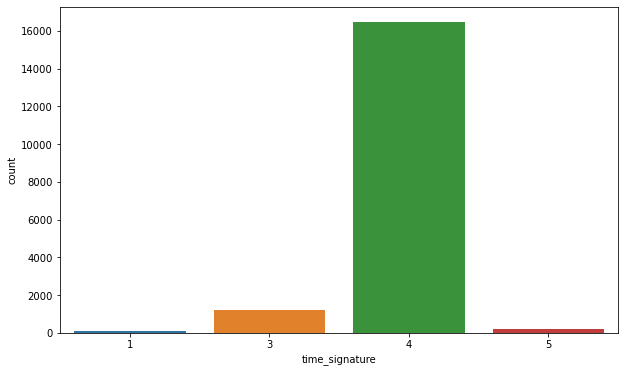

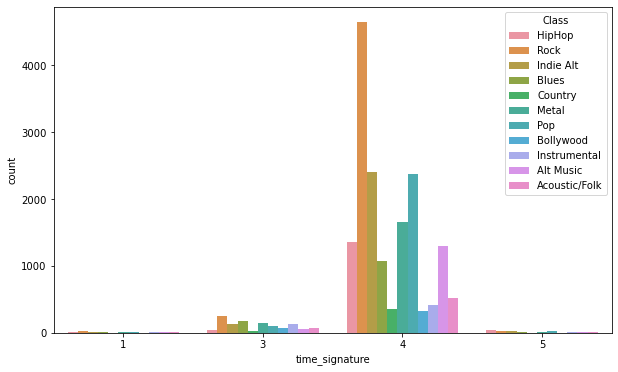

In [30]:
cat_viz(df, "time_signature"), 
cat_viz_2(df, "time_signature", "Class")

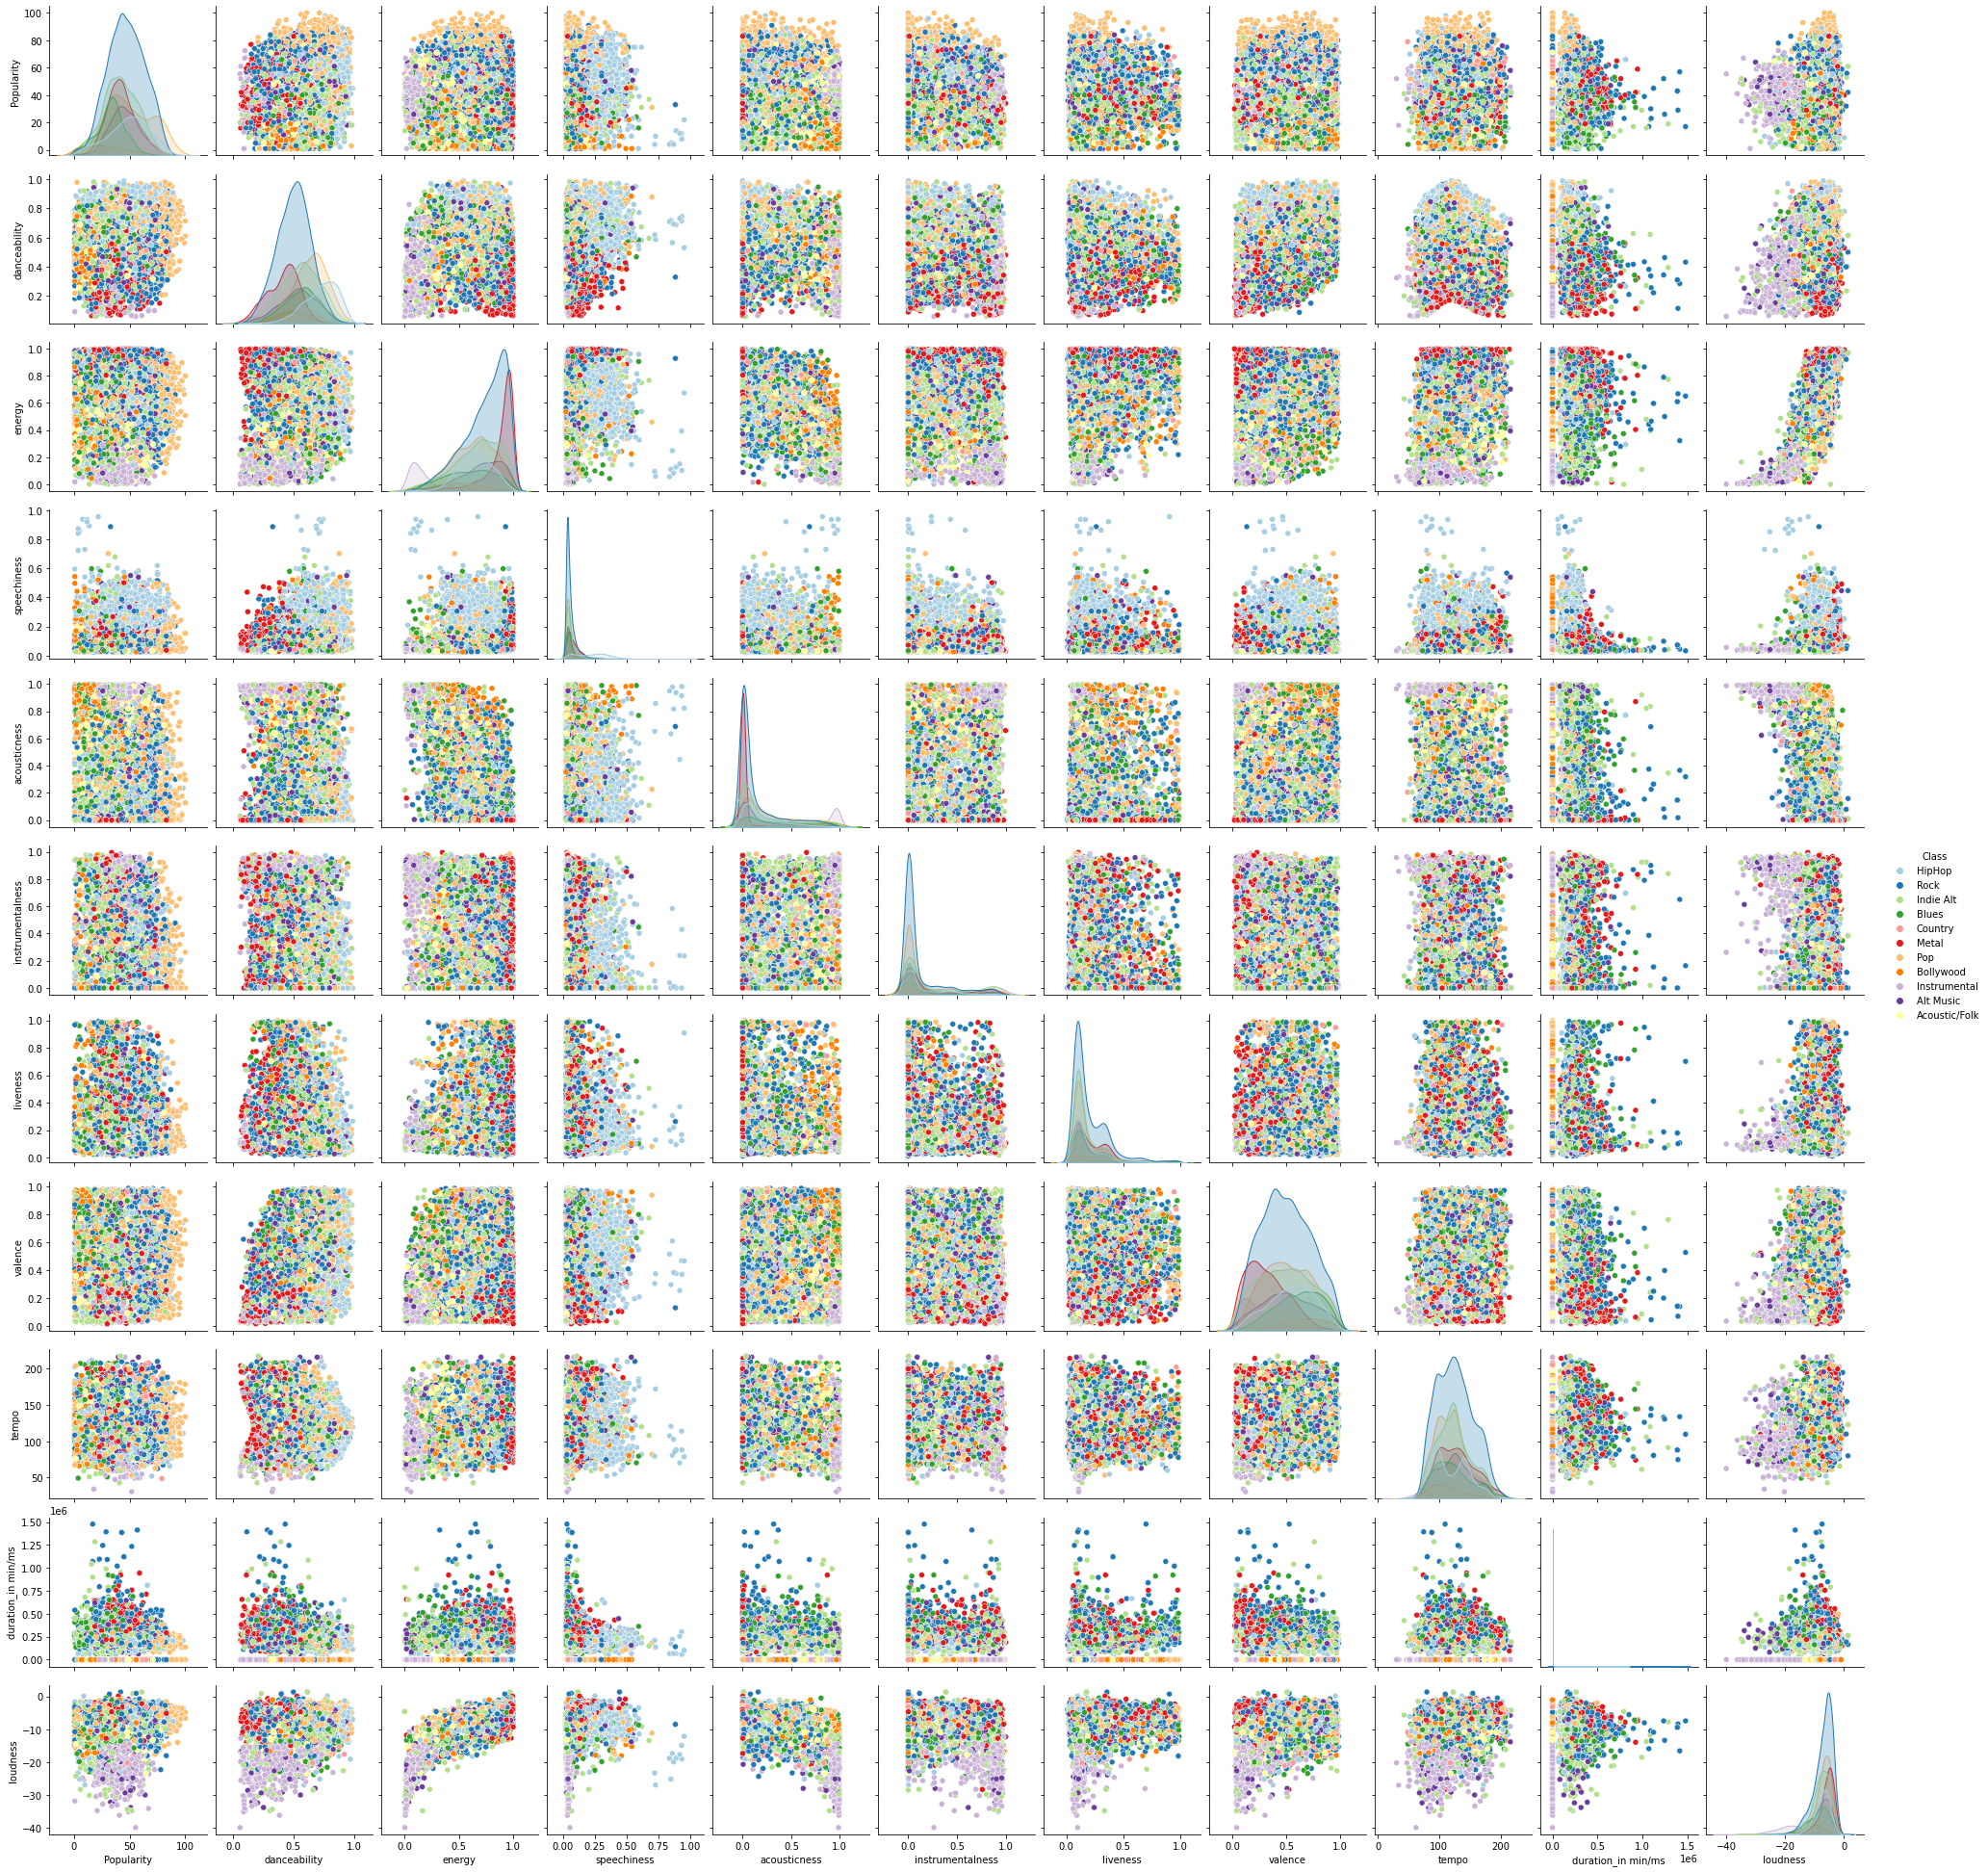

In [31]:
cols= ['Popularity','danceability',"energy","speechiness", "acousticness", 'instrumentalness','liveness',"valence","tempo","duration_in min/ms","loudness", "Class"]
sns.pairplot(df[cols],hue='Class', palette= 'Paired')

## Feature Engineering

In [32]:
df['All']= df['Popularity']+ df['danceability']+ df['energy']+ df['loudness']+ df['speechiness']+ df['acousticness']+df['instrumentalness']+df['liveness']+df['valence']+df['tempo']
df_test['All']= df_test['Popularity']+ df_test['danceability']+ df_test['energy']+ df_test['loudness']+ df_test['speechiness']+ df_test['acousticness']+df_test['instrumentalness']+df_test['liveness']+df_test['valence']+df_test['tempo']

In [33]:
df['Artist_Popularity']= df.groupby(['Artist Name'])['Popularity'].transform('max')
df_test['Artist_Popularity']= df_test.groupby(['Artist Name'])['Popularity'].transform('max')
df['Artist_danceability']= df.groupby(['Artist Name'])['danceability'].transform('mean')
df_test['Artist_danceability']= df_test.groupby(['Artist Name'])['danceability'].transform('mean')
df['Artist_energy']= df.groupby(['Artist Name'])['energy'].transform('mean')
df_test['Artist_energy']= df_test.groupby(['Artist Name'])['energy'].transform('mean')
df['Artist_loudness']= df.groupby(['Artist Name'])['loudness'].transform('mean')
df_test['Artist_loudness']= df_test.groupby(['Artist Name'])['loudness'].transform('mean')
df['Artist_speechiness']= df.groupby(['Artist Name'])['speechiness'].transform('mean')
df_test['Artist_speechiness']= df_test.groupby(['Artist Name'])['speechiness'].transform('mean')
df['Artist_acousticness']= df.groupby(['Artist Name'])['acousticness'].transform('mean')
df_test['Artist_acousticness']= df_test.groupby(['Artist Name'])['acousticness'].transform('mean')
df['Artist_instrumentalness']= df.groupby(['Artist Name'])['instrumentalness'].transform('mean')
df_test['Artist_instrumentalness']= df_test.groupby(['Artist Name'])['instrumentalness'].transform('mean')
df['Artist_liveness']= df.groupby(['Artist Name'])['liveness'].transform('mean')
df_test['Artist_liveness']= df_test.groupby(['Artist Name'])['liveness'].transform('mean')
df['Artist_valence']= df.groupby(['Artist Name'])['valence'].transform('mean')
df_test['Artist_valence']= df_test.groupby(['Artist Name'])['valence'].transform('mean')
df['Artist_tempo']= df.groupby(['Artist Name'])['tempo'].transform('mean')
df_test['Artist_tempo']= df_test.groupby(['Artist Name'])['tempo'].transform('mean')

In [34]:
df['Artist_All']=df.groupby(['Artist Name'])['All'].transform('mean')
df_test['Artist_All']=df_test.groupby(['Artist Name'])['All'].transform('mean')

In [35]:
df['Artist_duration']= df.groupby(['Artist Name'])['duration_in min/ms'].transform('mean')
df_test['Artist_duration']= df_test.groupby(['Artist Name'])['duration_in min/ms'].transform('mean')
df['Artist_song_min']= df.groupby(['Artist Name'])['duration_in min'].transform('mean')
df_test['Artist_song_min']= df_test.groupby(['Artist Name'])['duration_in min'].transform('mean')

In [36]:
df['Artist_Track']= df.groupby('Artist Name')['Track Name'].transform('count')
df_test['Artist_Track']= df_test.groupby('Artist Name')['Track Name'].transform('count')

In [37]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'duration_in min',
       'All', 'Artist_Popularity', 'Artist_danceability', 'Artist_energy',
       'Artist_loudness', 'Artist_speechiness', 'Artist_acousticness',
       'Artist_instrumentalness', 'Artist_liveness', 'Artist_valence',
       'Artist_tempo', 'Artist_All', 'Artist_duration', 'Artist_song_min',
       'Artist_Track'],
      dtype='object')

In [38]:
key_train= pd.get_dummies(df['key'], drop_first= True, prefix= 'key_')
key_test= pd.get_dummies(df_test['key'], drop_first= True, prefix= 'key_')
df = df.drop('key', axis= 1)
df_test = df_test.drop('key', axis= 1)
df= pd.concat([df,key_train], axis=1)
df_test= pd.concat([df_test,key_test], axis=1)

In [39]:
time_train= pd.get_dummies(df['time_signature'], drop_first= True, prefix= 'time_')
time_test= pd.get_dummies(df_test['time_signature'], drop_first= True, prefix= 'time_')
df = df.drop('time_signature', axis= 1)
df_test = df_test.drop('time_signature', axis= 1)
df= pd.concat([df,time_train], axis=1)
df_test= pd.concat([df_test,time_test], axis=1)

In [40]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms', 'Class',
       'duration_in min', 'All', 'Artist_Popularity', 'Artist_danceability',
       'Artist_energy', 'Artist_loudness', 'Artist_speechiness',
       'Artist_acousticness', 'Artist_instrumentalness', 'Artist_liveness',
       'Artist_valence', 'Artist_tempo', 'Artist_All', 'Artist_duration',
       'Artist_song_min', 'Artist_Track', 'key__2.0', 'key__3.0', 'key__4.0',
       'key__5.0', 'key__6.0', 'key__7.0', 'key__8.0', 'key__9.0', 'key__10.0',
       'key__11.0', 'time__3', 'time__4', 'time__5'],
      dtype='object')

## Correlation Matrix

<AxesSubplot:>

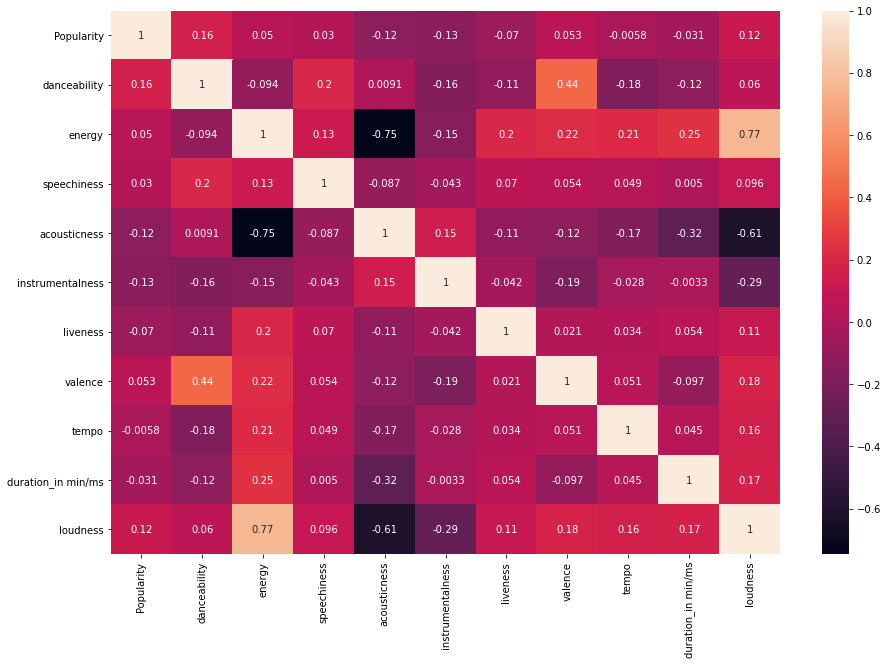

In [41]:
cols= ['Popularity','danceability',"energy","speechiness", "acousticness", 'instrumentalness','liveness',"valence","tempo","duration_in min/ms","loudness"]
cor= df[cols].corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(cor, annot= True)

## Feature Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
le= LabelEncoder()
df['Class']= le.fit_transform(df['Class'])

In [43]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, log_loss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings("ignore")

In [44]:
X= df.drop(columns= ['Class'], axis= 1)
y= df['Class']

X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=y, random_state= 42, train_size= 0.80)

In [45]:
cat_cols = ['Artist Name', 'Track Name']
n_folds = 10
subbed = []
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=10)


for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    print('=============== Fold No:',fold+1,'===============')
    X_tr, X_tst = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_tr, y_tst = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = CatBoostClassifier(n_estimators=10000, random_state=10, eval_metric= 'MultiClass', cat_features=cat_cols)
    model.fit(X_tr, y_tr,eval_set=[(X_tst, y_tst)], early_stopping_rounds=30, verbose=500)
    print(log_loss(y_tst, model.predict_proba(X_tst)))
    subbed.append(log_loss(y_tst, model.predict_proba(X_tst)))
    pred = model.predict_proba(X_test)
print(np.mean(subbed))

=============== Fold No: 1 ===============
Learning rate set to 0.04716
0:	learn: 2.2981138	test: 2.2968444	best: 2.2968444 (0)	total: 946ms	remaining: 2h 37m 37s
500:	learn: 0.7806589	test: 0.8664030	best: 0.8664030 (500)	total: 4m 22s	remaining: 1h 22m 48s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8523055091
bestIteration = 857

Shrink model to first 858 iterations.
0.8523055090836564
=============== Fold No: 2 ===============
Learning rate set to 0.04716
0:	learn: 2.2986236	test: 2.2990113	best: 2.2990113 (0)	total: 609ms	remaining: 1h 41m 29s
500:	learn: 0.7800925	test: 0.8283194	best: 0.8283194 (500)	total: 4m 15s	remaining: 1h 20m 41s
1000:	learn: 0.6330738	test: 0.8115726	best: 0.8111992 (981)	total: 8m 28s	remaining: 1h 16m 7s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8111992146
bestIteration = 981

Shrink model to first 982 iterations.
0.8111992145509451
=============== Fold No: 3 ===============
Learning rate set to 0.04716


In [46]:
cat = pd.DataFrame(pred)
cat

0         1         2         3         4         5         6   \
0     0.030799  0.003680  0.013205  0.894412  0.007072  0.005971  0.006587   
1     0.012195  0.075775  0.105225  0.002298  0.000239  0.019176  0.657672   
2     0.000123  0.073083  0.032478  0.000020  0.000040  0.000682  0.098790   
3     0.717854  0.002888  0.000690  0.099197  0.111149  0.000754  0.002975   
4     0.000809  0.134088  0.026860  0.000081  0.000231  0.021105  0.245137   
...        ...       ...       ...       ...       ...       ...       ...   
3595  0.000306  0.032715  0.017096  0.000257  0.000481  0.000933  0.539389   
3596  0.000012  0.043299  0.015049  0.000008  0.000019  0.000669  0.025815   
3597  0.000354  0.015924  0.369241  0.000072  0.000061  0.000310  0.015773   
3598  0.000112  0.089296  0.043658  0.000012  0.000012  0.001550  0.057719   
3599  0.000012  0.023980  0.012987  0.000004  0.000009  0.000084  0.026801   

            7         8         9         10  
0     0.005771  0.000151  0.020722  0.011631  
1     0.004670  0.005375  0.080079  0.037296  
2     0.000051  0.113135  0.009702  0.671896  
3     0.054177  0.000626  0.006518  0.003171  
4     0.000039  0.040172  0.039857  0.491620  
...        ...       ...       ...       ...  
3595  0.000150  0.002823  0.047402  0.358449  
3596  0.000005  0.223271  0.005076  0.686776  
3597  0.000067  0.002241  0.002221  0.593736  
3598  0.000007  0.228337  0.011274  0.568022  
3599  0.000006  0.308468  0.001292  0.626358  

[3600 rows x 11 columns]

In [47]:
cat = cat.rename(columns={0:'Acoustic/Folk_0',
               1:'Alt_Music_1',
               2:'Blues_2',
               3:'Bollywood_3',
               4:'Country_4',
               5:'HipHop_5',
               6:'Indie Alt_6',
               7:'Instrumental_7',
               8:'Metal_8',
               9:'Pop_9',
               10:'Rock_10'})

In [48]:
cat.to_csv("Cat_Boost_3.csv", index= False)